In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE

In [7]:
# reading of csv data in the jupyter file
df = pd.read_csv(r"C:\Users\carna\Desktop\Lung Cancer Detection\Dataset\survey lung cancer.csv")

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [12]:
df.shape

(309, 16)

In [13]:
df.select_dtypes(include="int64").nunique()

AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
dtype: int64

In [14]:
df.duplicated().sum()

33

In [15]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [17]:
column_names = df.columns.to_list()
print(column_names)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


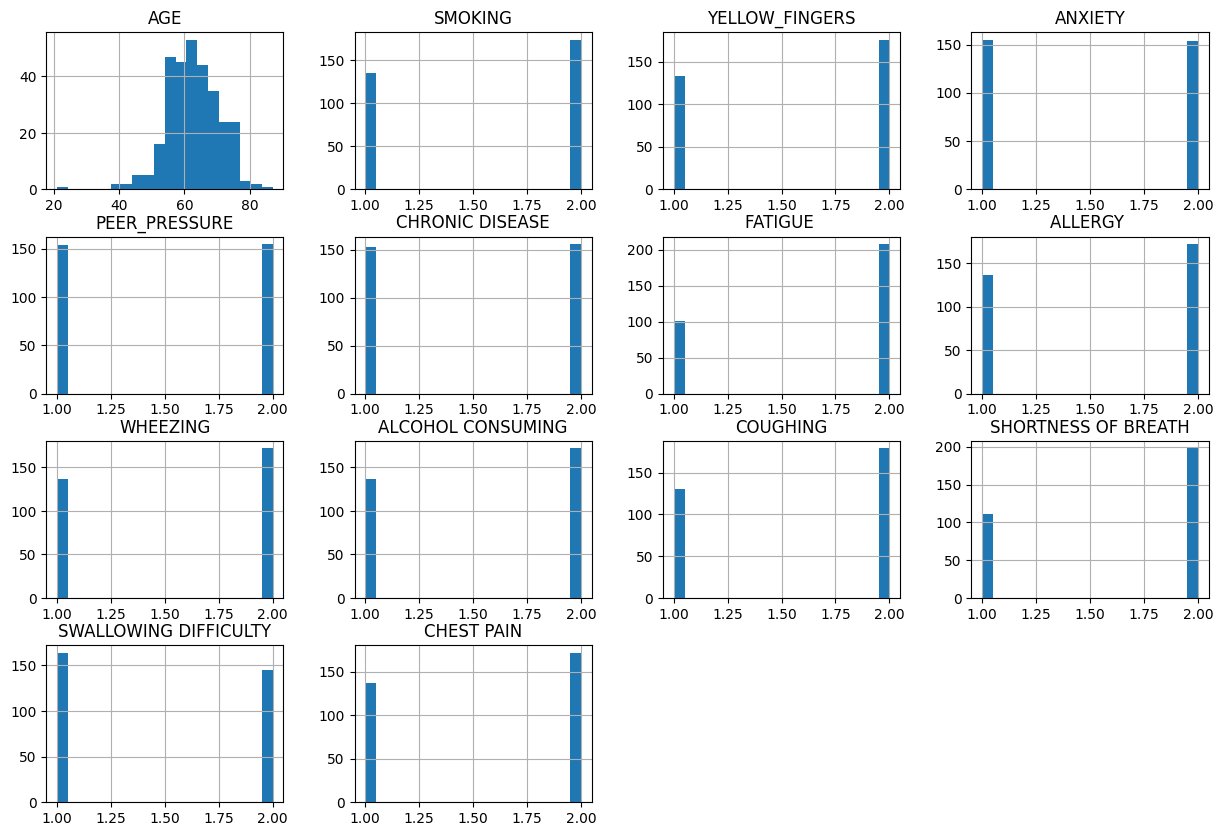

In [18]:
#Histogram for all attributes

df.hist(bins=20,figsize=(15,10))
plt.show()

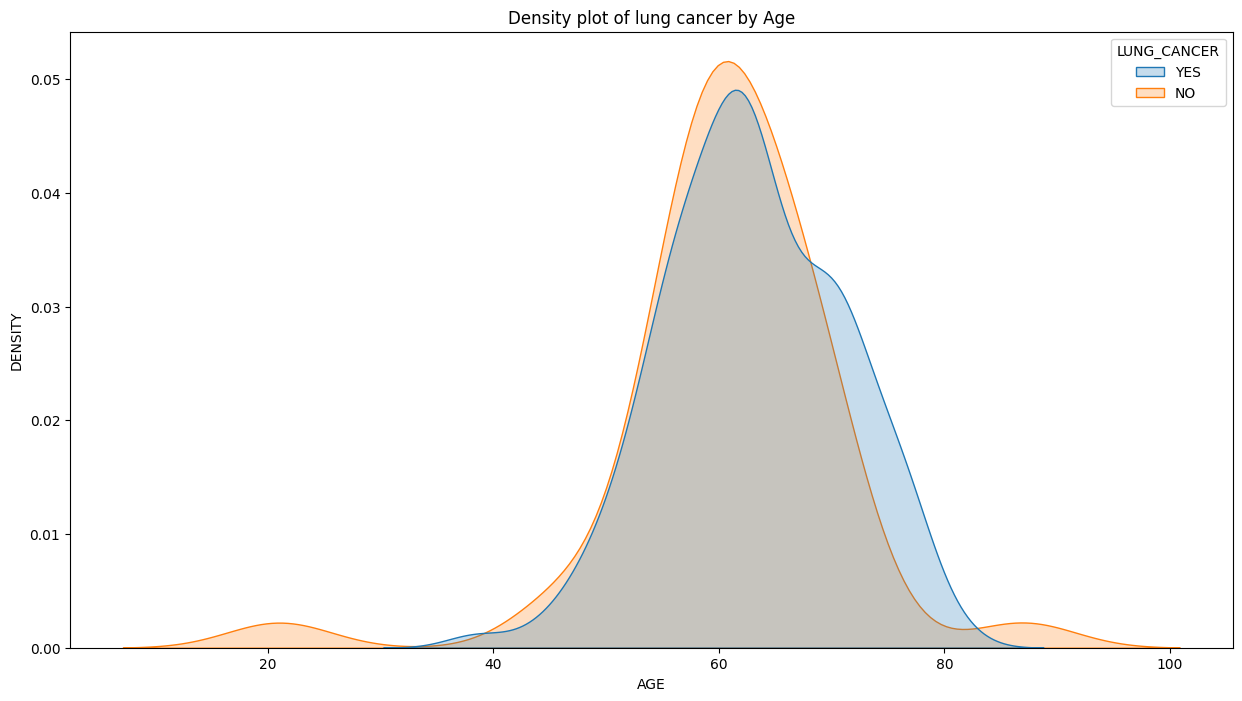

In [21]:
#Density plot for 'LUNG_CANCER' variable

plt.figure(figsize=(15,8))
sns.kdeplot(data=df,x='AGE',hue='LUNG_CANCER',common_norm=False,fill=True)
plt.title('Density plot of lung cancer by Age')
plt.xlabel('AGE')
plt.ylabel('DENSITY')
plt.show()

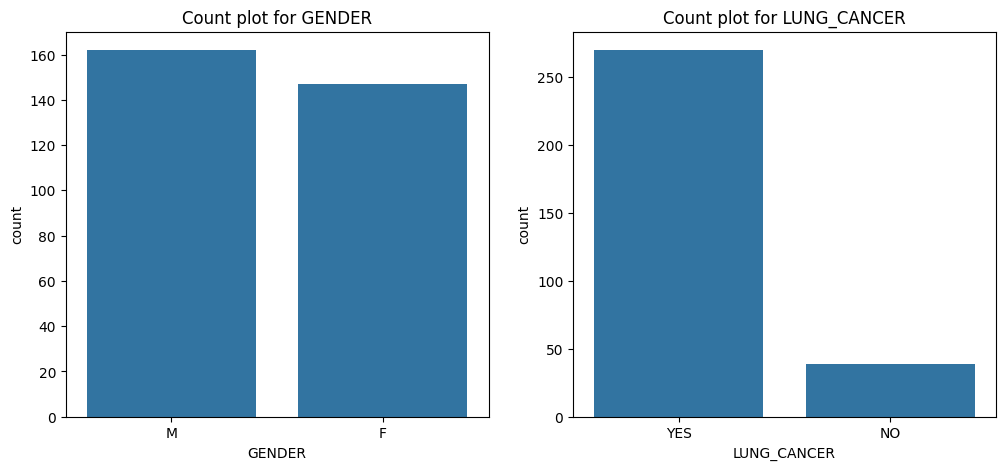

In [24]:
# count_plot for Gender and Lung Cancer

categorical_columns = ['GENDER','LUNG_CANCER']
fig,axes = plt.subplots(nrows=1, ncols=len(categorical_columns),figsize=(12,5))

for i,col in enumerate(categorical_columns):
    sns.countplot(x=col,data=df,ax=axes[i])
    axes[i].set_title(f'Count plot for {col}')

plt.show()

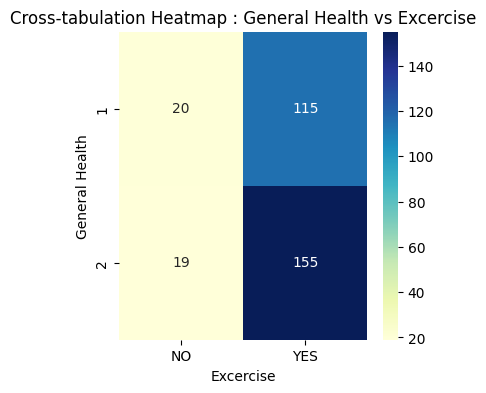

In [34]:
#HEATMAP for General Health and Excercise

crosstab = pd.crosstab(df['SMOKING'],df['LUNG_CANCER'])
plt.figure(figsize=(4,4))
sns.heatmap(crosstab,annot=True,fmt='d',cmap='YlGnBu')
plt.title('Cross-tabulation Heatmap : General Health vs Excercise')
plt.xlabel('Excercise')
plt.ylabel('General Health')
plt.show()

Label Encoder

In [36]:
# LabelEncoder: Converts categorical labels into numerical values, making them suitable for model training.
# Used because most machine learning algorithms require numerical input, and this tool helps in encoding categorical features.

df_encoded = df.copy()

label_encoder = LabelEncoder()

for i in df_encoded.select_dtypes(include="object"):
    df_encoded[i] = label_encoder.fit_transform(df_encoded[i])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


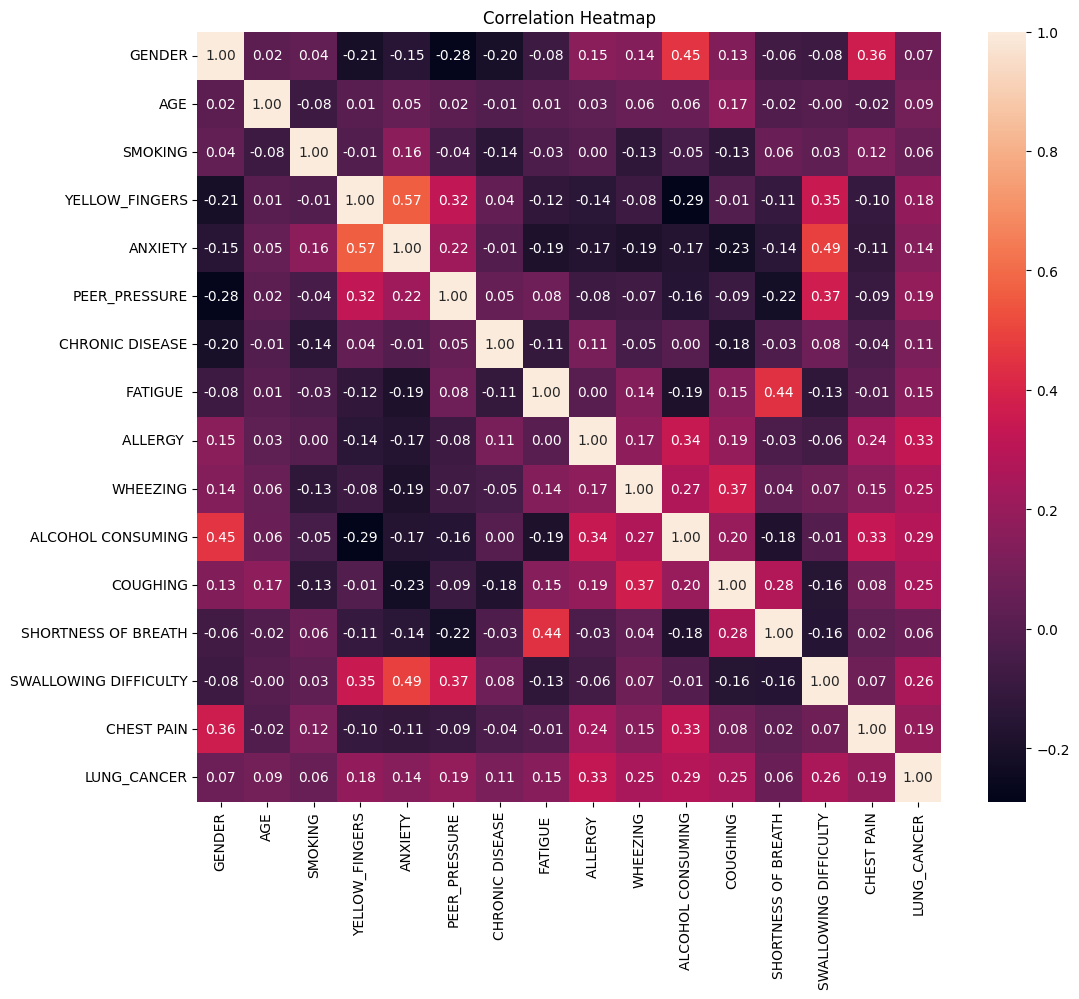

In [37]:
# Co-relation matrix defines the co-relation between two attributes of the given dataset.

corelation_matrix = df_encoded.corr()
plt.figure(figsize=(12,10))

sns.heatmap(corelation_matrix,annot=True,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# Check for Variable Class

df_encoded['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [40]:
X = df_encoded.drop(columns=['LUNG_CANCER'])
y = df_encoded['LUNG_CANCER']

SMOTE

In [44]:
# SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples to balance class distribution, addressing class imbalance.
# Used to handle imbalanced datasets by oversampling the minority class, which is important for improving the model's ability to predict rare events.

smote = SMOTE(random_state=42)
X_balanced,y_balanced = smote.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42)

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (432, 15)
X_test shape (108, 15)
y_train shape (432,)
y_test shape (108,)


In [46]:
#Finding Quantile and Percentile for the given data. Therefore, helps us to find out the outliers.

selected_columns = ['GENDER','AGE','SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 
                    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

Q1 = X_train[selected_columns].quantile(0.25)
Q2 = X_train[selected_columns].quantile(0.75)

IQR = Q2-Q1
threshold = 1.5

outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold*IQR)) | (X_train[selected_columns] > (Q2 + threshold*IQR))
).any(axis=1)

X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers : {num_rows_removed}")

Number of rows removed due to outliers : 7


Logistic Regression

In [47]:
# Logistic Regression: A linear model for binary classification that estimates probabilities using the logistic function.
# Used because it is a simple and interpretable model, effective for binary classification tasks such as predicting the presence or absence of lung cancer.

lr_model = LogisticRegression()
lr_model.fit(X_train_clean,y_train_clean)

lr_predictions = lr_model.predict(X_test)

lr_auc = roc_auc_score(y_test,lr_predictions)

accuracy = accuracy_score(y_test,lr_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("LogisticRegression Classification Report :")
print(classification_report(y_test,lr_predictions))

Logistic Regression Accuracy: 0.95
LogisticRegression Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.93      0.98      0.96        57

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



c:\Users\carna\.conda\envs\newenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [51]:
from sklearn.pipeline import make_pipeline

In [55]:
# SVM (Support Vector Machine): A classifier that finds the optimal hyperplane to separate classes in the feature space, effective for high-dimensional data.
# Used because it is particularly effective for datasets with a clear margin of separation, and it performs well in high-dimensional spaces.

svc_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))

param_grid = {
    'svc__C': [0.1,1,10],
    'svc__kernel':['linear','rbf','poly']
}

grid_search = GridSearchCV(svc_pipeline,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_clean, y_train_clean)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Model Accuracy",accuracy)
print("Classification Report: \n",report)

Best Parameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Model Accuracy 0.9444444444444444
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.93      0.96      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



Decision Tree

In [59]:
# Decision Tree: A model that splits data into branches to make decisions, useful for both classification and regression tasks.
# Used because it provides an intuitive understanding of feature importance and decision rules, and can handle both categorical and continuous data

dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None,5,10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_clean, y_train_clean)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Model Accuracy",accuracy)
print("Classification Report: \n",report)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Model Accuracy 0.9351851851851852
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.95      0.93      0.94        57

    accuracy                           0.94       108
   macro avg       0.93      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



Random Forest Classifier

In [60]:
# Random Forest: An ensemble learning method that combines multiple decision trees to improve accuracy and prevent overfitting.
# Used because it provides better accuracy than individual decision trees by reducing variance and improving generalization


rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [50,100,200],
    'criterion' : ['gini','entropy'],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10,15],
    'min_samples_leaf' : [1,2,4,5]
}

grid_search = GridSearchCV(rf_model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_clean, y_train_clean)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Model Accuracy",accuracy)
print("Classification Report: \n",report)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Model Accuracy 0.9444444444444444
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.92      0.98      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



XGBoost Classifier

In [62]:
# XGBoost (Extreme Gradient Boosting): A powerful ensemble method based on gradient boosting that provides high performance and accuracy.
# Used because it is highly efficient and often outperforms other models, especially in structured data problems like lung cancer detection.


xgb_model = XGBRFClassifier(random_state = 42)

param_grid = {
    'n_estimators' : [50,100,200],
    'learning_rate' : [0.001,0.01,0.1,0.2],
    'max_depth' : [3,5,7],
    'subsample' : [0.8,1.0]
}

grid_search = GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_clean, y_train_clean)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Model Accuracy",accuracy)
print("Classification Report: \n",report)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Model Accuracy 0.9444444444444444
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.93      0.96      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108

